# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080037 sha256=fb417dbc8ba5b3c66957953bd6d7c3b1fb045bca86c1bdc3e565a247484f6349
  Stored in directory: /root/.cache/pip/wheels/00/1b/23/26649f4d0923cdfb0b6445e3d10d262a4824747b942a592dd1
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing install

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "omarhayder"
kaggle_key = "b5553427278f6d235df4d83f7bf20214"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.2MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train = train.drop(['casual','registered'], axis=1)

In [ ]:
predictor = TabularPredictor(label='count',
eval_metric='root_mean_squared_error').fit(train_data=train,                                        
                                           time_limit=600, 
                                           presets="best_quality")
                                    

In [12]:
best_model = predictor.fit_summary().loc['best_row', 'model']

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.134108      33.168277  516.543741                0.001503           0.433988            3       True         13
1   RandomForestMSE_BAG_L2  -53.432328      25.676626  399.937987                1.069065          43.372789            2       True         11
2          LightGBM_BAG_L2  -55.144636      25.165037  395.902411                0.557477          39.337213            2       True         10
3        LightGBMXT_BAG_L2  -60.422754      31.540232  433.399751                6.932672          76.834554            2       True          9
4          CatBoost_BAG_L2  -61.281453      24.789895  389.487952                0.182334          32.922755            2       True         12
5    KNeighborsDist_BAG_L1  -84.125061       0.044506    0.032392         

/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** End of fit() summary ***


AttributeError: ignored

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.084565      39.499909  567.828526                0.001008           0.309235            3       True         13
1   RandomForestMSE_BAG_L2  -53.371395      30.541184  442.030724                0.691104          45.384167            2       True         12
2          LightGBM_BAG_L2  -55.173882      30.475951  432.008230                0.625871          35.361673            2       True         11
3        LightGBMXT_BAG_L2  -60.648125      38.181926  486.773451                8.331846          90.126894            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.084592    0.058610                0.084592           0.058610            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.085929    0.859215         

/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.81225141542228

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    22.985447
1    41.799107
2    45.782608
3    48.887268
4    51.751762
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.360115
std        89.824333
min         3.234967
25%        19.904104
50%        63.179371
75%       166.423004
max       367.326782
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
#np.count_nonzero(predictions < 0)
len([x for x in predictions if x < 0])

0

In [ ]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 385kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-04-03 18:18:18  first raw submission  complete  1.80320      1.80320       


#### Initial score of `?` is  1.80320

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

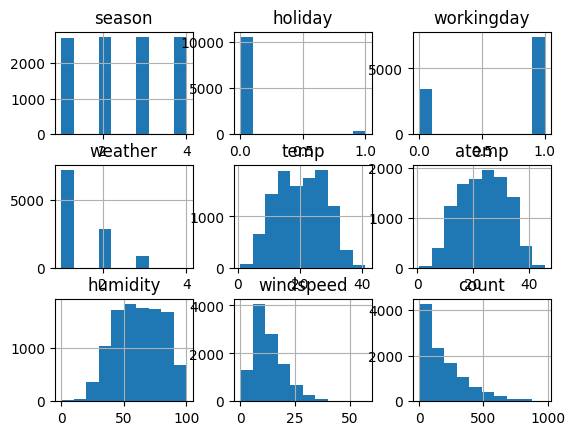

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [11]:
# create a new feature
# Convert datetime column to pandas datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

# Create new columns for year, month, day, hour, and day of the week
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.dayofweek

train = train.drop('datetime', axis=1)

# Convert datetime column to pandas datetime format
test['datetime'] = pd.to_datetime(test['datetime'])

# Create new columns for year, month, day, hour, and day of the week
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek

test = test.drop('datetime', axis=1)

In [12]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


**Make category types for these so models know they are not just numbers**
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       10886 non-null  category
 1   holiday      10886 non-null  int64   
 2   workingday   10886 non-null  int64   
 3   weather      10886 non-null  category
 4   temp         10886 non-null  float64 
 5   atemp        10886 non-null  float64 
 6   humidity     10886 non-null  int64   
 7   windspeed    10886 non-null  float64 
 8   count        10886 non-null  int64   
 9   year         10886 non-null  int64   
 10  month        10886 non-null  int64   
 11  day          10886 non-null  int64   
 12  hour         10886 non-null  int64   
 13  day_of_week  10886 non-null  int64   
dtypes: category(2), float64(3), int64(9)
memory usage: 1.0 MB


In [12]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_of_week
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [13]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

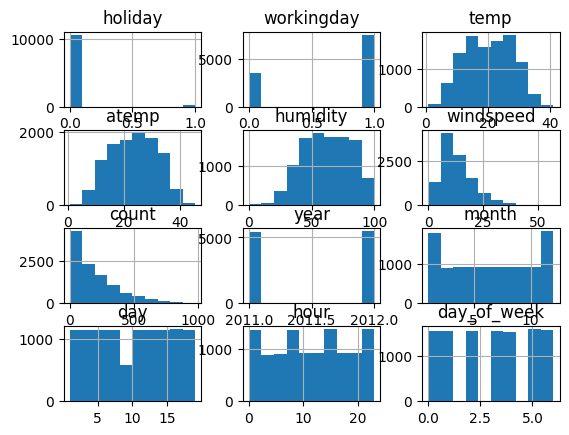

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [14]:
predictor_new_features = TabularPredictor(label='count',
eval_metric='root_mean_squared_error').fit(train_data=train,                                        
                                           time_limit=600, 
                                           presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230411_232844/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230411_232844/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

KeyboardInterrupt: ignored

In [17]:
best_model = predictor_new_features.fit_summary().loc['best_row', 'model']

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.734433      53.494834  558.554976                0.001630           0.522177            3       True         13
1      WeightedEnsemble_L2  -32.819890      50.708843  376.458639                0.001276           0.447156            2       True          8
2          CatBoost_BAG_L2  -33.046811      51.510747  442.116010                0.145570          65.986989            2       True         12
3          LightGBM_BAG_L2  -33.179944      51.671683  411.457215                0.306505          35.328195            2       True         10
4   RandomForestMSE_BAG_L2  -33.329017      52.491801  420.541004                1.126623          44.411984            2       True         11
5        LightGBMXT_BAG_L2  -33.734546      51.914508  412.305630         

/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


AttributeError: ignored

In [ ]:
predictor_new_features.fit_summary()

In [40]:
# Remember to set all negative values to zero
pred = predictor_new_features.predict(test)
pred.describe()

count    6493.000000
mean      191.255539
std       173.075821
min        -5.987834
25%        47.200878
50%       150.494034
75%       284.058685
max       897.028870
Name: count, dtype: float64

In [45]:
len([x for x in pred if x < 0])

0

In [47]:
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [48]:
# Same submitting predictions
submission_new_features["count"] = pred
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [53]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "10rand600"

100% 242k/242k [00:01<00:00, 210kB/s]
Successfully submitted to Bike Sharing Demand

In [54]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                       date                 description                        status    publicScore  privateScore  
-----------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_hpo10random600.csv  2023-04-09 19:59:32  10rand600                          complete  0.50234      0.50234       
submission_new_hpo.csv         2023-04-06 03:38:34  new features with hyperparameters  complete  0.45316      0.45316       
submission_new_features.csv    2023-04-06 02:59:17  new features                       complete  0.45552      0.45552       
submission.csv                 2023-04-03 18:18:18  first raw submission               complete  1.80320      1.80320       


#### New Score of `?` is 0.45552

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [15]:
#hyperparameters = {'learning_rate': ag.Real(0.01, 0.1),
#                   'num_epochs': ag.Int(10, 100)}
#hyperparameter_tune_kwargs = {'num_trials': 15,
#                              'search_strategy': 'auto'}

predictor_new_hpo = TabularPredictor(label='count',
eval_metric='root_mean_squared_error').fit(train_data=train,                                        
                                           time_limit=1200, 
                                           presets="best_quality")
#                                           hyperparameter_tune_kwargs = hyperparameter_tune_kwargs )

No path specified. Models will be saved in: "AutogluonModels/ag-20230411_233152/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230411_233152/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [16]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.438305      24.055045  980.325197                0.000885           0.297519            3       True         18
1      WeightedEnsemble_L2  -32.644606      20.234607  628.374790                0.000839           0.388912            2       True          9
2     ExtraTreesMSE_BAG_L2  -32.771486      22.332081  707.794096                0.708031           7.190722            2       True         14
3          CatBoost_BAG_L2  -32.776372      21.700425  752.090374                0.076375          51.487000            2       True         13
4          LightGBM_BAG_L2  -33.008701      21.803695  724.131544                0.179646          23.528170            2       True         11
5   NeuralNetFastAI_BAG_L2  -33.105295      22.187468  837.842284         

/usr/local/lib/python3.9/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsemb

In [56]:
# Remember to set all negative values to zero
new_pred = predictor_new_hpo.predict(test)
new_pred.describe()

count    6493.000000
mean      191.260956
std       173.084167
min        -6.003427
25%        47.196877
50%       150.483246
75%       283.977997
max       896.926575
Name: count, dtype: float64

In [57]:
new_pred = new_pred.apply(lambda x: 0 if x < 0 else x)

In [61]:
# Same submitting predictions
submission_hpo = pd.read_csv('sampleSubmission.csv')
submission_hpo.head()
submission_hpo["count"] = new_pred
submission_hpo.to_csv("submission_hpo.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_hpo.csv -m "new features with hyperparameters 15auto600"

100% 242k/242k [00:00<00:00, 285kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                       date                 description                                  status    publicScore  privateScore  
-----------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
submission_hpo.csv             2023-04-09 20:23:16  new features with hyperparameters 15auto600  complete  0.50262      0.50262       
submission_hpo10random600.csv  2023-04-09 19:59:32  10rand600                                    complete  0.50234      0.50234       
submission_new_hpo.csv         2023-04-06 03:38:34  new features with hyperparameters            complete  0.45316      0.45316       
submission_new_features.csv    2023-04-06 02:59:17  new features                                 complete  0.45552      0.45552       


#### New Score of `?` is 0.45316

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

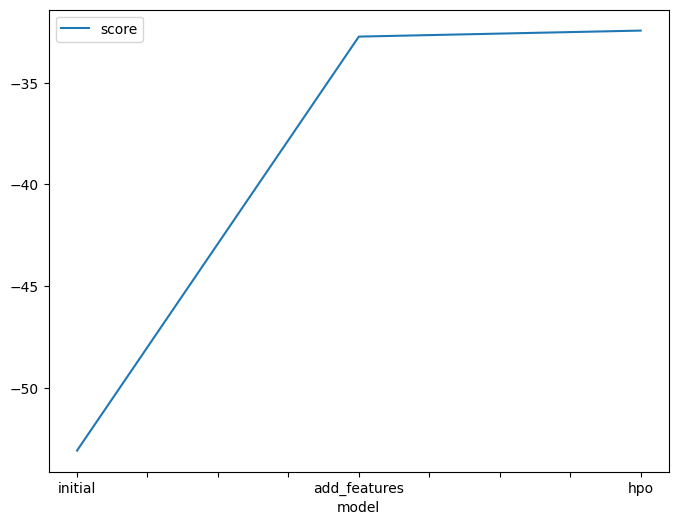

In [17]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.084565 , -32.734433, -32.438305]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

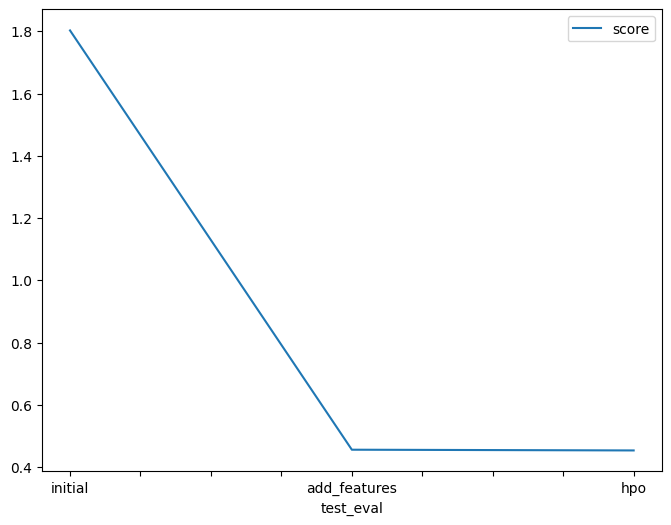

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80320, 0.45552, 0.45316]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time limit": [600, 600, 600],
    "presets": [best_quality, best_quality, best_quality],
    "num_trails": [default, default, 15],
    "score": [1.80320, 0.45552, 0.45316]
})

,model,hpo1,hpo2,hpo3,score
0,initial,32,64,128,1.80320
1,add_features,10,20,30,0.45552
2,hpo,100,50,200,0.45316
